# Raport z projektu 2 - klasteryzacja
Grupa: Kacper Staroń, Jakub Szypuła, Anna Urbala

## Wstęp teoretyczny

### Na czym polega klasteryzacja?
Klasteryzacja polega na szukaniu skupień w zbiorze. Pozwala znaleźć naturalne podziały, wyodrębnić pewne struktury.

### Przykładowe algorytmy
Jednymi z najbardziej popularnych algorytmów są:

- **K-means** - iteracyjnie przypisuje punkty do skupień (do punktów wybranych jako środki), na podstawie otrzymanych skupień wylicza nowe ich środki; trzeba samemu dobrać liczbę skupień
- **hierarchiczne** (z różnymi typami połączeń klastrów) - dzieli istniejące klastry na kolejne klastry, póki odległość między nimi nie jest za mała (odległość zależy od typu połączenia, minimalną odległość można zdefiniować samemu)
- **DBSCAN** - znajduje punkty o wysokiej gęstości i na ich podstawie rozszerza klastry

### Ocena *jakości* klastrowania
Istnieje wiele różnych metryk oceny jakości klastrowania. Każda z nich zwraca uwagę na coś innego, dlatego powinny być dobierane na podstawie tego, co chcemy osiągnąć przez klastrowanie. Oto kilka przykładów:

- **metryka silhouette** - mierzy, jak dobrze pasują punkty do klastrów, niestety premiuje okrągłe klastry
- **indeks Daviesa-Bouldina** - miara podobieństwa klastra z najbardziej podobnym klastrem, podobieństwo liczone na podstawie odległości między klastrami i wewnątrz klastrów
- **różne miary odnośnie odległości między klastrami/w klastrze** - porównanie różnych miar (średnia ogległość między klastrami, najmniejsza odległość między klastrami, odległość punktu od środka klastra) daje nam pewną możliwość oceny klastrowania z uwzględnieniem parametrów, na których nam najbardziej zależy


## Opis zbioru danych
Wybrany przez nas zbiór danych to: [A study of Asian Religious and Biblical Texts Data Set](https://archive.ics.uci.edu/ml/datasets/A+study+of++Asian+Religious+and+Biblical+Texts). Dotyczy świętych tekstów różnych religii.

Składa się z 3 plików dotyczących tych samych danych, ale w innym formacie.

- `Complete_data .txt` - zawiera nieobrobiony tekst ksiąg
- `AllBooks_baseline_DTM_Unlabelled.csv` - tekst ksiąg w reprezentacji *bag-of-words* - słowa to kolumny, księgi wiersze, wartości w komórkach to liczba wystąpień danego słowa w księdze
- `AllBooks_baseline_DTM_Labelled.csv` - jak wyżej, ale z podpisem ksiąg

## Cel projektu
Celem projektu jest znalezienie sensownego podziału między księgami. Być może podział ten będzie w jakimś stopniu zgodny z podziałem na religie.

## Opis rozwiązania
Pierwszym problemem, który musieliśmy rozwiązać była obróbka oryginalnego tekstu. Niestety przez to, że pewne słowa występują bardzo rzadko, mogło być dość problematyczne operowanie na całej tabeli *AllBooks_baseline_DTM_Unlabelled*. Postanowiliśmy położyć pewien nacisk na zliczenie częstotliwości występowania słów w księgach.

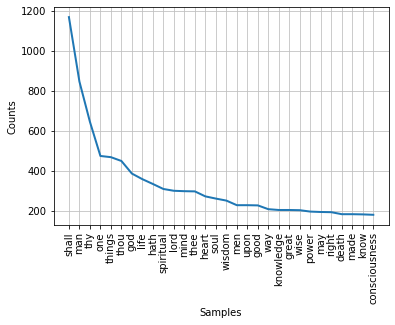

Powyższy wykres zasugerował nam również, że porównywanie słów poza TOP ok. 30-50 pod kątem częstotliwości prawdopodobnie nie ma sensu, gdyż nie będą występowały w prawie żadnej księdze. Być może warto spróbować porównywania korpusów.

Zainteresowało nas również, jakie słowa są najpopularniejsze w zależności od księgi.

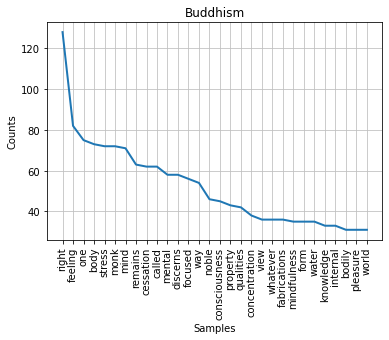

### Jak liczyć odległości?
Zdefiniowaliśmy 2 metody liczenia odległości między klastrami:

- cały tekst (z wyłączeniem stop words) przekształcony do miar TF-IDF i na tych miarach klasyczna odległość euklidesowa
- ograniczenie tekstu do $k$ najczęściej występujących słów (w naszym przypadku przyjęliśmy $k=30$) i na tym analogiczne operacje

### Wizualizowanie modeli

Biorąc pod uwagę budowę analizowanego zbioru danych i ilość parametrów, które przetwarzają modele klasterujące, zdecydowaliśmy się zwizualizować efekty ich działania za pomocą t-SNE.


### Wartości metryk dla wstępnych modeli

 **model**|**clusters num** |**mean dist in clust ↓**|**std dev dist in clust ↓**|**mean dist to clust center ↓**|**davies-bouldin ↓**|**min dist between clusters ↑**|**silhouette ↑**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
Agglomerative ward linkage|3.0|1.174056|0.119025|0.827009|3.334753|0.792830|0.041090
Agglomerative complete linkage|3.0|1.249152|0.102270|0.882001|6.741079|0.672026|0.023263
Agglomerative average linkage|3.0|1.088455|0.170585|0.723249|2.147604|0.852063|0.034598
Agglomerative single linkage|3.0|NaN|NaN|0.311270|0.985968|1.000000|-0.015797
Mini Batch KMeans|3.0|1.219163|0.126875|0.856340|4.335287|0.567902|0.052720
Kmeans|3.0|1.194311|0.125399|0.842978|3.686640|0.567902|0.053785

Wyniki nie są zadowalające, ale modele radzące sobie najlepiej to Agglomerative ward linkage oraz Kmeans. Wizualizację ich klasteryzacji widzimi poniżej:

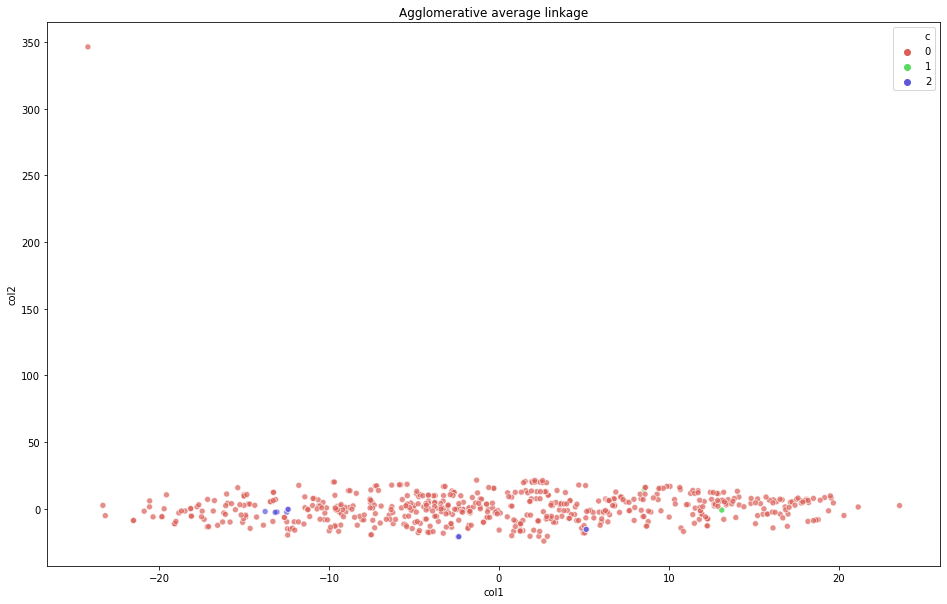

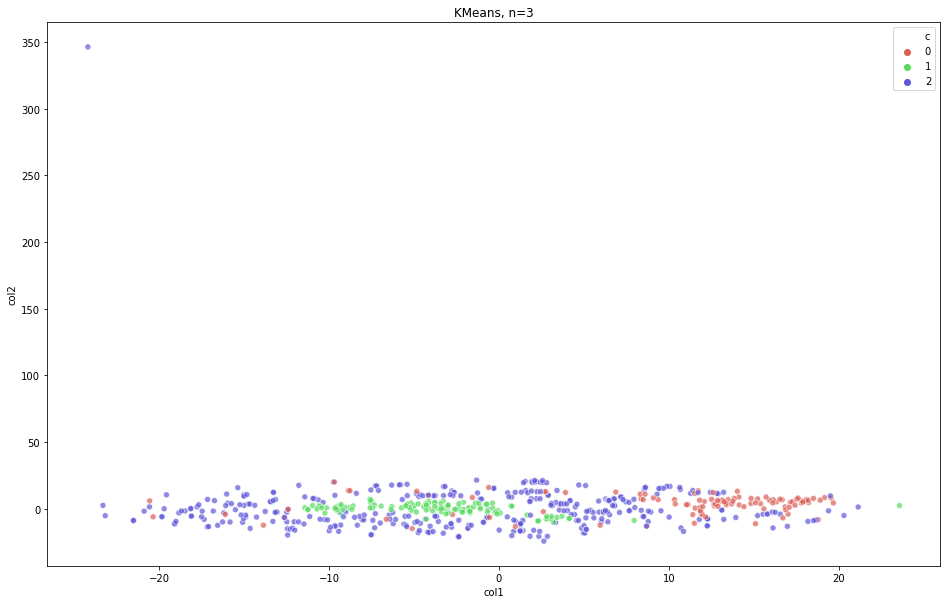

Warte uwagi było też działanie Kmeans dla 8 klastrów:

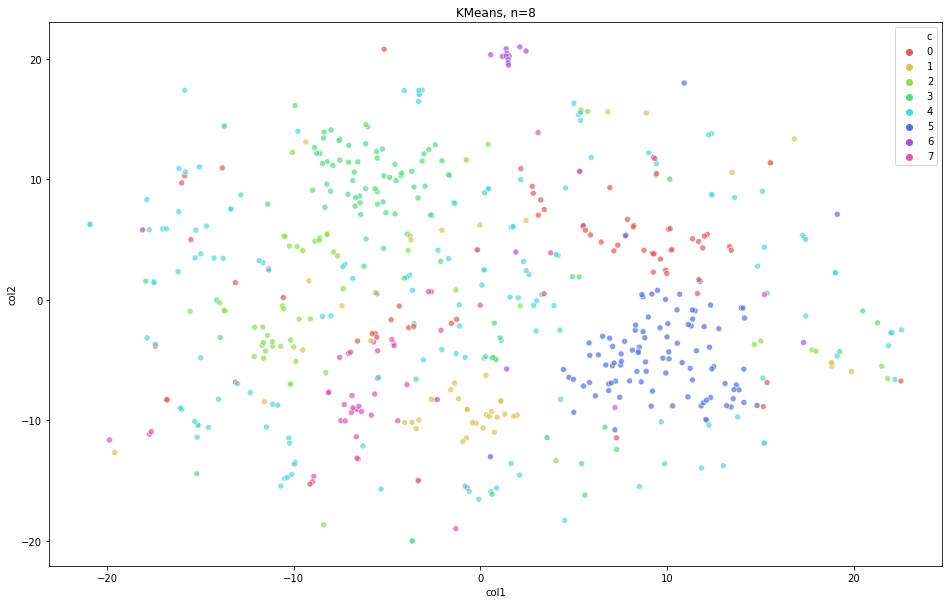

**model**|**clusters num**|**mean dist in clust ↓**|**std dev dist in clust ↓**|**mean dist to clust center ↓**|**davies-bouldin ↓**|**min dist between clusters ↑**|**silhouette ↑**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
Agglomerative ward linkage|10.0|0.658365|0.226952|0.488231|1.270449|0.478933|0.323363
Agglomerative complete linkage|10.0|0.696521|0.144138|0.525002|1.450325|0.440409|0.276652
Agglomerative average linkage|10.0|0.595802|0.276128|0.443627|1.250900|0.494142|0.298544
Agglomerative single linkage|10.0|NaN|NaN|0.116205|1.239330|0.665383|0.000082
Mini Batch KMeans|10.0|0.647580|0.238650|0.448997|1.219784|0.404198|0.309391
Kmeans|10.0|0.676405|0.183187|0.501152|1.189429|0.414123|0.342313

W przypadku procesowania całego tekstu metryka silhouette dała nam bardzo niskie wartości, w przypadku top 30 słów znacznie lepsze, ale nieco sprzeczne z indeksem Daviesa-Bouldina. Najbardziej wyróżniającym się modelem był Agglomerative ward linkage.

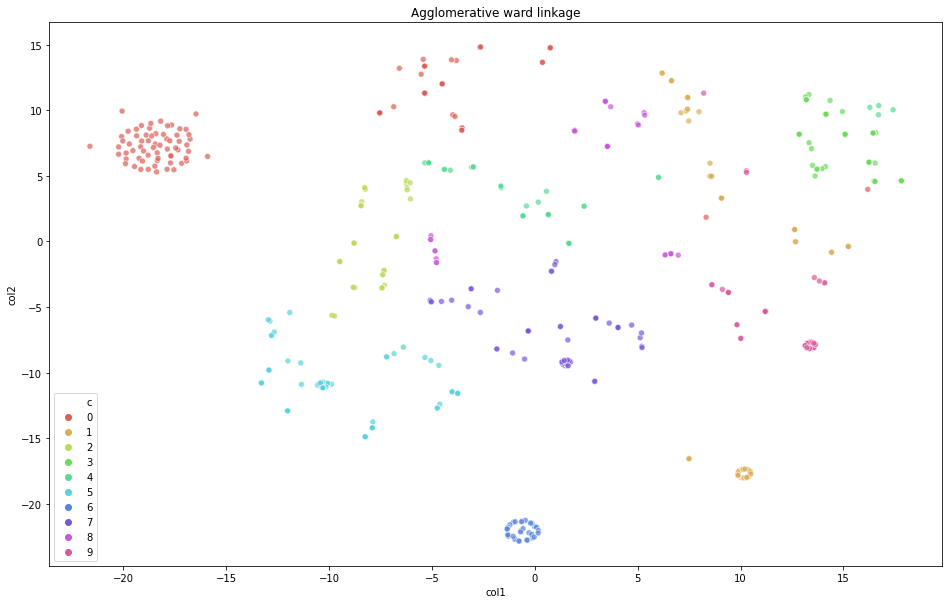

Postanowiliśmy jednak sprawdzić jeszcze bardzo popularne algorytmy DBSCAN i GMM.

#### DBSCAN

| **eps** | **clusters num** | **mean dist in clust ↓** | **std dev dist in clust ↓** | **mean dist to clust center ↓** | **davies-bouldin ↓** | **min dist between clusters ↑** | **silhouette ↑** |
|:-----:|:--------------:|:--------------------:|:-----------------------:|:---------------------------:|:----------------:|:---------------------------:|:------------:|
| 0.1 | 1.0          | 1.319530           | 0.000000              | 0.933880                  | NaN            | inf                       | NaN        |
| 0.2 | 1.0          | 1.319530           | 0.000000              | 0.933880                  | NaN            | inf                       | NaN        |
| 0.3 | 1.0          | 1.319530           | 0.000000              | 0.933880                  | NaN            | inf                       | NaN        |
| 0.4 | 1.0          | 1.319530           | 0.000000              | 0.933880                  | NaN            | inf                       | NaN        |
| 0.5 | 2.0          | 0.915165           | 0.405571              | 0.633499                  | 1.556112       | 0.533469                  | -0.030633  |
| 0.6 | 3.0          | 0.865496           | 0.323055              | 0.596172                  | 1.712393       | 0.548840                  | -0.022660  |
| 0.7 | 5.0          | 0.850090           | 0.249306              | 0.573131                  | 1.910902       | 0.633533                  | -0.029162  |
| 0.8 | 7.0          | 0.891919           | 0.199291              | 0.601810                  | 2.101353       | 0.649848                  | -0.005624  |
| 0.9 | 10.0         | 1.000851           | 0.164401              | 0.677092                  | 2.686207       | 0.710173                  | 0.037307   |

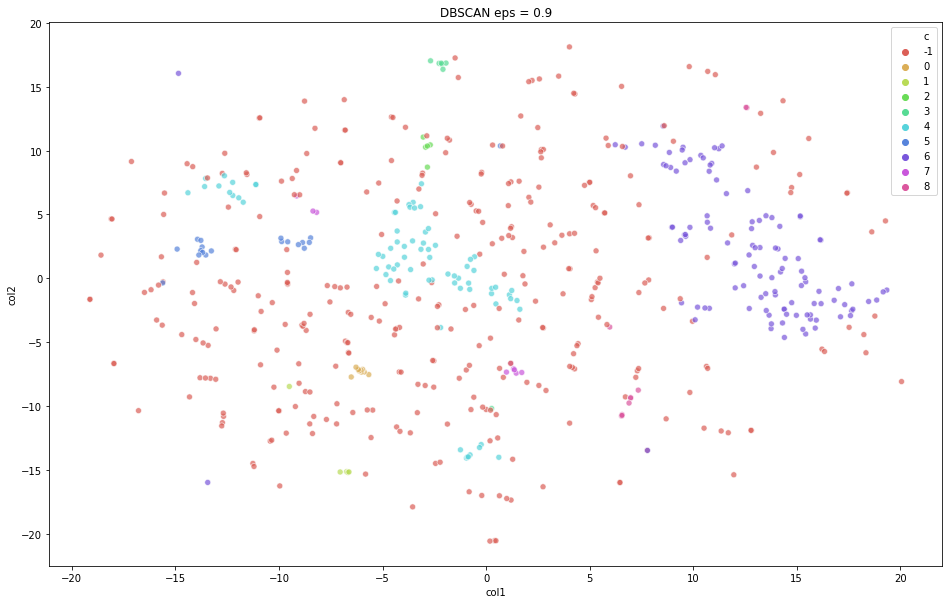

| **eps** | **clusters num** | **mean dist in clust ↓** | **std dev dist in clust ↓** | **mean dist to clust center ↓** | **davies-bouldin ↓** | **min dist between clusters ↑** | **silhouette ↑** |
|:---:|:------------:|:------------------:|:---------------------:|:-------------------------:|:--------------:|:-------------------------:|:----------:|
| 0.1 | 29.0         | 0.041254           | 0.218298              | 0.029553                  | 0.985460       | 0.350730                  | 0.385813   |
| 0.2 | 29.0         | 0.041254           | 0.218298              | 0.029553                  | 0.985460       | 0.350730                  | 0.385813   |
| 0.3 | 29.0         | 0.041254           | 0.218298              | 0.029553                  | 0.985460       | 0.350730                  | 0.385813   |
| 0.4 | 33.0         | 0.067941           | 0.216107              | 0.050334                  | 1.037136       | 0.412582                  | 0.419838   |
| 0.5 | 40.0         | 0.192560           | 0.234998              | 0.148261                  | 1.164041       | 0.380407                  | 0.522180   |
| 0.6 | 15.0         | 0.414437           | 0.405827              | 0.309569                  | 2.062636       | 0.417129                  | 0.157025   |
| 0.7 | 4.0          | 0.566451           | 0.570819              | 0.389698                  | 1.931544       | 0.591547                  | 0.001176   |
| 0.8 | 3.0          | 0.411164           | 0.581474              | 0.295838                  | 1.623308       | 0.838272                  | 0.001540   |
| 0.9 | 2.0          | 0.616319           | 0.616319              | 0.443617                  | 1.947414       | 1.000000                  | -0.056503  |

Niestety liczba $>20$ klastrów nas raczej nie interesuje, więc będziemy się raczej trzymać 3-10.

#### GMM

| **n_components** | **clusters num** | **mean dist in clust ↓** | **std dev dist in clust ↓** | **mean dist to clust center ↓** | **davies-bouldin ↓** | **min dist between clusters ↑** | **silhouette ↑** |
|:------------:|:------------:|:------------------:|:---------------------:|:-------------------------:|:--------------:|:-------------------------:|:----------:|
| 1            | 1.0          | 1.319530           | 0.000000              | 0.933880                  | NaN            | inf                       | NaN        |
| 2            | 2.0          | 1.183476           | 0.149325              | 0.835472                  | 2.854261       | 0.767523                  | 0.044869   |
| 3            | 3.0          | 1.218418           | 0.134799              | 0.860109                  | 5.028543       | 0.637202                  | 0.046390   |
| 4            | 4.0          | 1.198903           | 0.110442              | 0.844414                  | 3.853182       | 0.567902                  | 0.059237   |
| 5            | 5.0          | 1.208471           | 0.115716              | 0.851208                  | 4.663830       | 0.567902                  | 0.058867   |
| 6            | 6.0          | 1.211113           | 0.103458              | 0.852472                  | 4.002571       | 0.611359                  | 0.064037   |
| 7            | 7.0          | 1.201482           | 0.103388              | 0.844493                  | 3.895216       | 0.611359                  | 0.065044   |
| 8            | 8.0          | 1.202501           | 0.098919              | 0.844819                  | 3.857847       | 0.567902                  | 0.067398   |
| 9            | 9.0          | 1.173179           | 0.099479              | 0.822335                  | 3.859540       | 0.445178                  | 0.051533   |

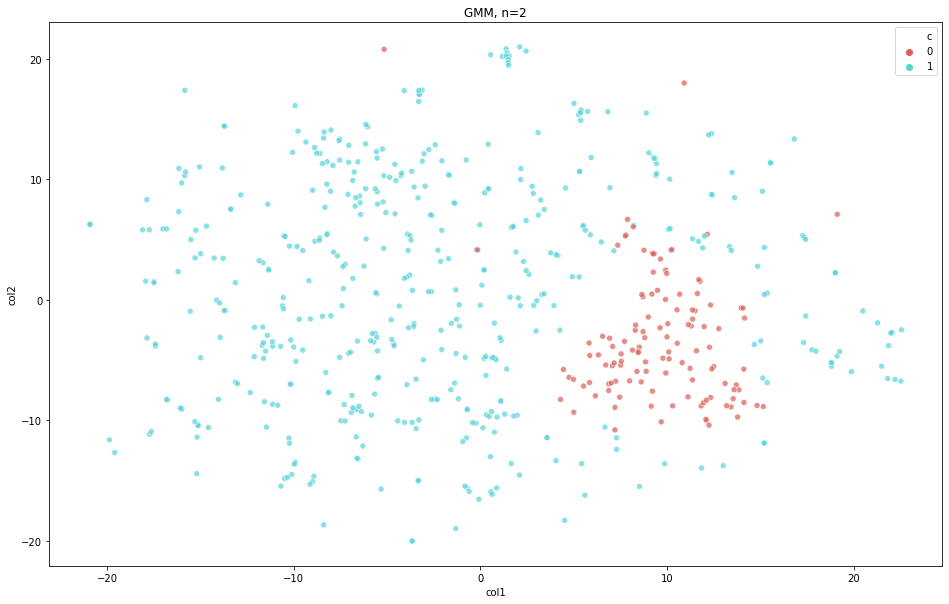

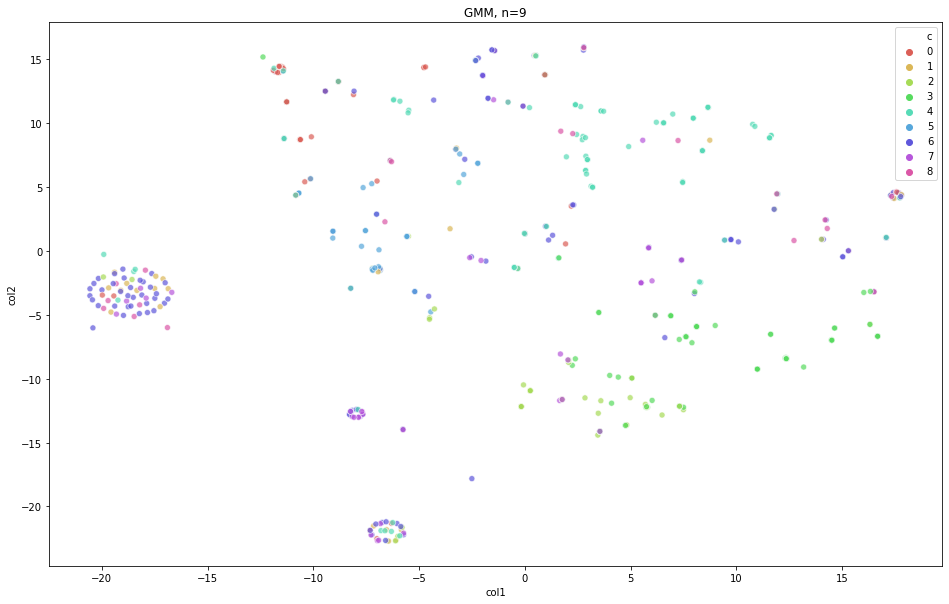

| **n_components** | **clusters num** | **mean dist in clust ↓** | **std dev dist in clust ↓** | **mean dist to clust center ↓** | **davies-bouldin ↓** | **min dist between clusters ↑** | **silhouette ↑** |
|:------------:|:------------:|:------------------:|:---------------------:|:-------------------------:|:--------------:|:-------------------------:|:----------:|
| 1            | 1.0          | 1.172193           | 0.000000              | 0.835972                  | NaN            | inf                       | NaN        |
| 2            | 2.0          | 1.097145           | 0.005059              | 0.790475                  | 2.859326       | 0.463015                  | 0.124465   |
| 3            | 3.0          | 0.959672           | 0.138119              | 0.691529                  | 2.218491       | 0.390689                  | 0.164824   |
| 4            | 4.0          | 0.996944           | 0.110973              | 0.734790                  | 2.589858       | 0.373751                  | 0.113205   |
| 5            | 5.0          | 0.883482           | 0.077994              | 0.639531                  | 1.942192       | 0.478745                  | 0.211663   |
| 6            | 6.0          | 0.893198           | 0.089095              | 0.656716                  | 2.056183       | 0.391464                  | 0.167301   |
| 7            | 7.0          | 0.828404           | 0.118178              | 0.609309                  | 1.966471       | 0.448004                  | 0.220890   |
| 8            | 8.0          | 0.845730           | 0.098704              | 0.624116                  | 1.999611       | 0.404198                  | 0.189627   |
| 9            | 9.0          | 0.721362           | 0.103372              | 0.531669                  | 1.317596       | 0.488615                  | 0.309927   |

Dla $n=8$ (czyli tyle, ile jest ksiąg!) mamy całkiem sensowne wartości.
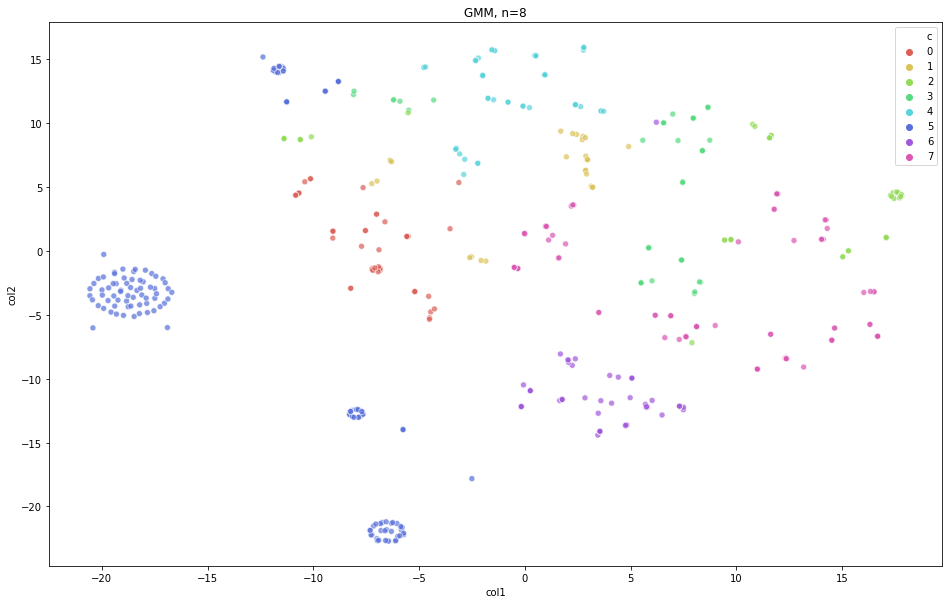

### Analiza sentymentów
Ponieważ dane z analizowanego zbioru są słowami języka naturalnego, interesujących zależności możemy poszukać stosując analizę sentymentów. Dlatego podeszliśmy do problemu też od innej strony.

Każdemu rozdziałowi możemy przypisać średnią emocję, tzn. dla każdej z 10 emocji 
* $anger$, 
* $anticipation$, 
* $disgust$, 
* $fear$, 
* $joy$, 
* $negative$, 
* $positive$, 
* $sadness$, 
* $surprise$, 
* $trust$. 

każdemu rozdziałowi przypisujemy średnią emocji danej księgi we wszystkich słowach z tego rozdziału.

### Szukanie odpowiedniego $k$

WCSS dla kolejnych wielkości k.

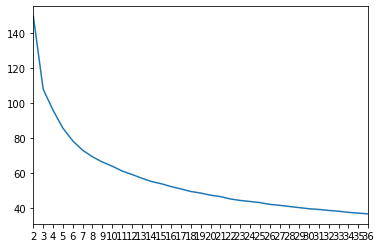

W żadnym momencie wykres nie "wypłaszcza się" znacząco", trudno wybrać odpowiednie k.

### Obliczenie i wyplotowanie miar dla różnych k

#### WCSS Score

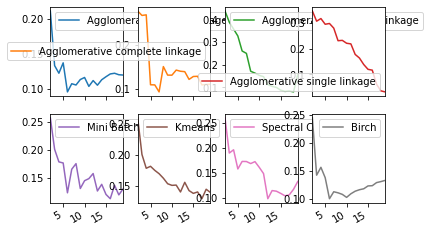

#### Indeks Davida-Bouldina

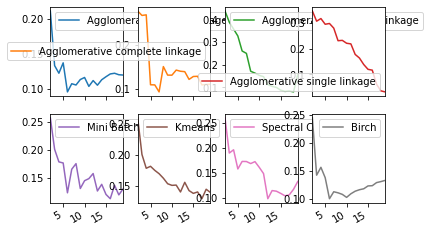

#### Miara Silhouette

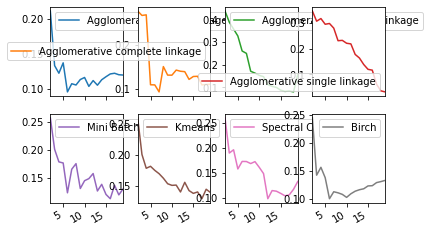

### Hipoteza o podziale wg ksiąg

Aby ocenić prawdziwość wcześniej podanej hipotezy, potrzebujemy nazw rodziałów i ksiąg.

**model**|**adjusted\_rand\_score**
:-----:|:-----:
Agglomerative ward linkage|0.031006
Agglomerative complete linkage|-0.009290
Agglomerative average linkage|-0.015803
Agglomerative single linkage|-0.003374
Mini Batch KMeans|0.009919
Kmeans|0.019211

Wyniki w żadnym wypadku nie przekraczają nawet 0.032, więc całkiem jasnym jest to, że podział obliczonhy na podstawie analizy sentymentów zupełnie nie pokrywa się z podziałem na księgi. Ze względu na niskie wyniki uznaliśmy, że nie ma potrzeby sprawdzania innych indeksów dla sprawdzenia poprawności.

### Wyplotowanie sentymentów

Oczywiście, można wyplotować wszystkie modele dla wszystkich wartości k, ale o wiele lepszym będzie wybranie "najlepszego" podziału i zaprezentowanie go.
Poniżej znajdują się tabelki z najlepszymi wynikami dla każdej kolumny, ze względu na $k$. Może się zdarzyć, że dla danego $k$ więcej niż jedna kolumna miała swój najlepszy wynik.

#### Miara Silhouette

**n\_clust**|**Agglomerative ward linkage**|**Agglomerative complete linkage**|**Agglomerative average linkage**|**Agglomerative single linkage**|**Mini Batch KMeans**|**Kmeans**|**Spectral Clustering**|**Birch**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
2|0.210926|0.277539|0.436363|0.347857|0.257529|0.259428|0.259428|0.245159

#### Indeks Davida-Bouldina
**n\_clust**|**Agglomerative ward linkage**|**Agglomerative complete linkage**|**Agglomerative average linkage**|**Agglomerative single linkage**|**Mini Batch KMeans**|**Kmeans**|**Spectral Clustering**|**Birch**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
16|1.529564|1.491536|1.033655|0.511339|1.678892|1.516245|1.620999|1.752677
4|1.789993|0.995377|0.945434|0.485516|1.726395|1.697025|1.600609|1.916066
2|1.753624|1.507330|0.755073|0.536715|1.451011|1.472556|1.472275|1.298259

Najlepszy okazuje się agglomerative (single linkage) model dla k=4. 
Żeby móc wyplotować 10 wymiarów, należy też najpierw dokonać ich redukcji: 

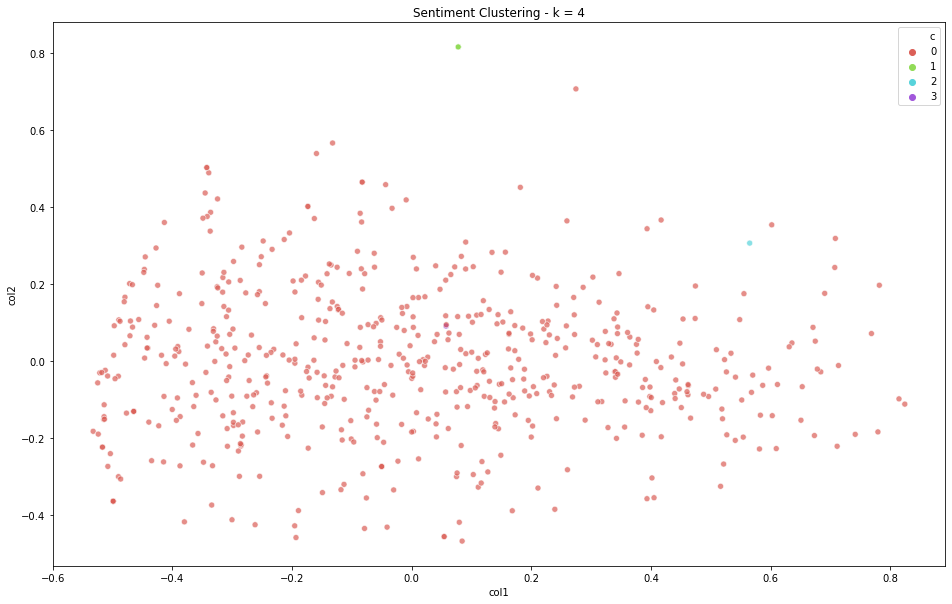

Nie jest to zbyt motywujące - po prostu jedna duża grupa i pojedyncze obserwacje poza.

Sentymenty można też zaprezentować w nieco inny sposób - poprzez wypisanie średnich wartości sentymentów dla każdego klastra (jest to już po standaryzacji).

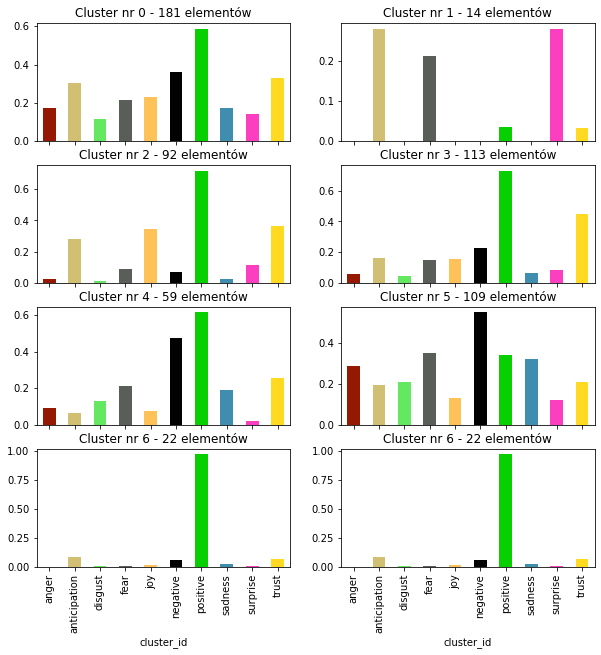

Ostatni wykres jest plotowany dwa razy w celu zachowania symetrii i adekwatnych podpisów pod osiami.

### Druga hipoteza - początek i koniec

Doszliśmy do jescze jednej hipotezy, którą postanowiliśmy sprawdzić - czy po wybraniu pierwszych i ostatnich rozdziałów każdej księgi klastering wg sentymentow zakwalifikuje je poprawnie (czyli: czy dla k=2 rozdziały zostaną poprawnie rozdzielone na "pierwsze" i "ostatnie").

**model**|**adjusted\_rand\_score**
:-----:|:-----:
Agglomerative ward linkage|-0.066667
Agglomerative complete linkage|-0.053512
Agglomerative average linkage|0.000000
Agglomerative single linkage|0.000000
Mini Batch KMeans|-0.066667
Kmeans|-0.053512
Spectral Clustering|-0.053512
Birch|-0.053512

Jak widać, niestety również ta hipoteza okazała się nieprawdziwa.

## Podsumowanie i wnioski

Celem projektu było przetworzenie i przeanalizowanie zbioru [A study of Asian Religious and Biblical Texts Data Set](https://archive.ics.uci.edu/ml/datasets/A+study+of++Asian+Religious+and+Biblical+Texts) zawierającego święte teksty należące do różnych religii podzielone na rozdziały i próba znalezienia w jego budowie dodatkowych struktur poprzez dokonanie klasteryzacji.

Podeszliśmy do tego problemu na dwa główne sposoby podstawowe dla przetwarzania języka naturalnego:
* reprezentacji rozdziału jako zbioru informacji o częstości występowania poszczególnych słów w tekście rozdziału
* reprezentacji rozdziału jako zbioru informacji o wartości tzw. sentymentów słów w tekście rozdziału

Analiza i klastrowanie sentymentów nie przyniosły satysfakcjonujących wyników. Po ręcznej analizie zbioru można było dostrzec znaczące odchylenia wartości pojedynczych emocji lub grup emocji definiujących zbiór ksiąg z analizowanego archiwum, ale mimo wszystko wartości te były do siebie zbliżone z uwagi na niewątpliwe występowanie wspólnych kluczowych elementów we wszystkich tekstach. Ostatecznie struktura, którą podpowiadała nam błędna intuicja, była zbyt niewyraźna, by mogła zostać uchwycona przez zastosowane przez nas algorytmy klastrujące i zdecydowanie nie pokrywała się z rzeczywistym podziałem na księgi.

Dużo lepsze efekty dało zastosowanie algorytmów klastrujących na zbiorze informacji o częstości występowania słów w rozdziałach, co potwierdzały zastosowane przez nas miary efektywności klastrowania, m.in. najpopularniejsze jak indeks Daviesa-Bouldina i miara $silhouette$.
Szczególnie zachęcające wydały się wyniki algorytmu GMM zastosowanego do utworzenia 8 klastrów (tylu, ile jest różnych ksiąg w zbiorze!).

Po zastosowaniu i analizie 8 różnych modeli o różnych parametrach na dwóch reprezentacjach zadanego zbioru nie zdołaliśmy ostatecznie zidentyfikować struktury ukrytej w danych, a tym bardziej pokrywającej się z podziałem wynikającym z przynależności poszczególnych rozdziałów do konkretnej księgi. Biorąc pod uwagę unikalny charakter analizowanego zbioru możliwe jest, że taka struktura nie istnieje lub do znalezienia jej wymagane jest dużo bardziej wyrafinowane podejście do problemu. 

## Oświadczenie
Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

Kacper Staroń 298842

Jakub Szypuła 298845

Anna Urbala 298847